# Diabetes Machine Learning Practice


*Based on the notebook **Step by Step Diabetes Classification-KNN-detailed** on Kaggle.com*

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### Importing and exploring data set

In [3]:
os.chdir('C:\\Users\\Owner\\Desktop\\DataScience\\Machine Learning Practice\MyGitHub\\Classification\\#2 Pima Indians Diabetes Challenge')

df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
(df['Insulin'] == 0).value_counts()

False    394
True     374
Name: Insulin, dtype: int64

In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning data

In [9]:
# minimum values of 0 do not make sense in certain columns (ex. glucose, blood pressure, skin thickness, insulin, BMI)
# replace 0's with Nan to count
df_copy = df.copy(deep = True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [10]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

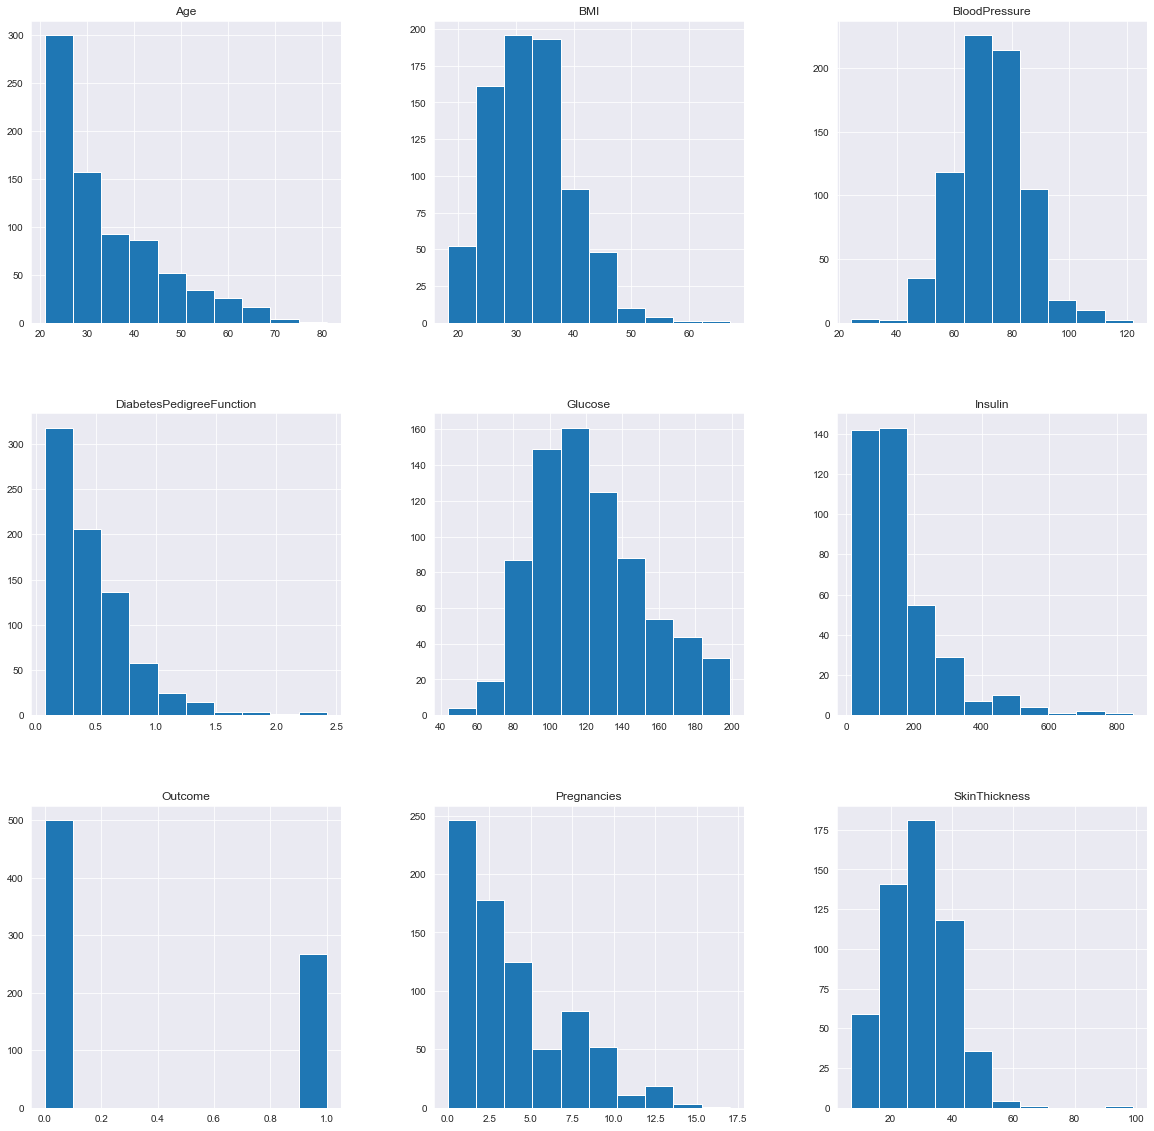

In [11]:
#need to see distributions of data for fill in values
p = df_copy.hist(figsize = (20,20))

In [12]:
#filling NA according to the distributions, median if outliers are present
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

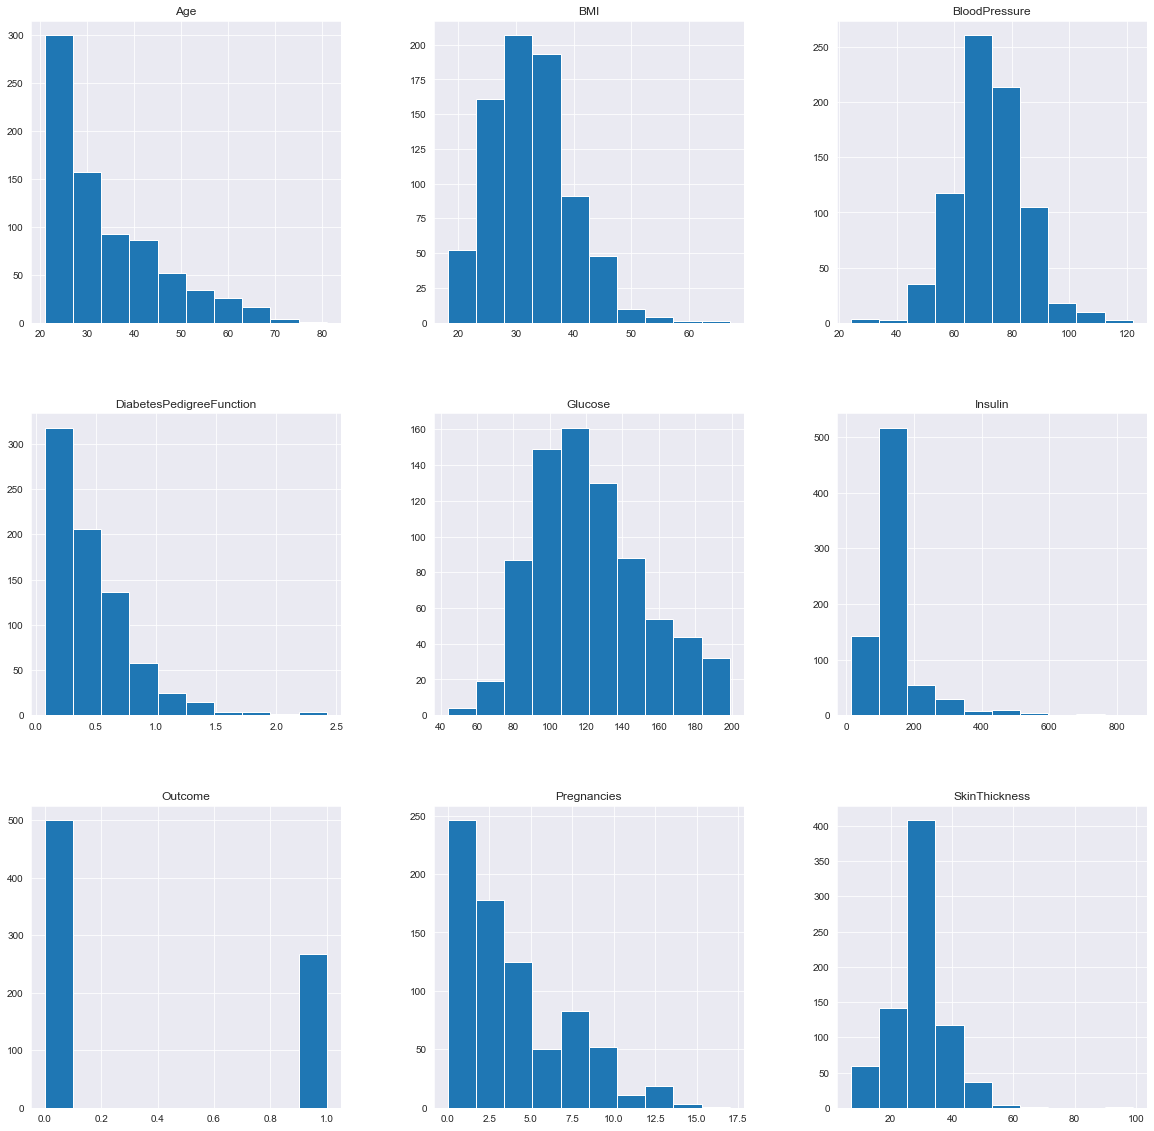

In [13]:
#plotting the data after the imputation - we introduced bias here
p = df_copy.hist(figsize = (20,20))

Text(0, 0.5, 'Count')

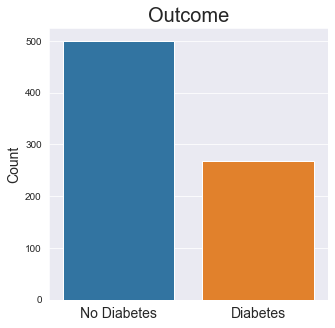

In [40]:
#exploring the target variable
df = df_copy

fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.countplot('Outcome', data = df, ax=ax)
ax.set_title('Outcome', fontsize = 20)
ax.set_xticklabels(['No Diabetes', 'Diabetes'], fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize = 14)

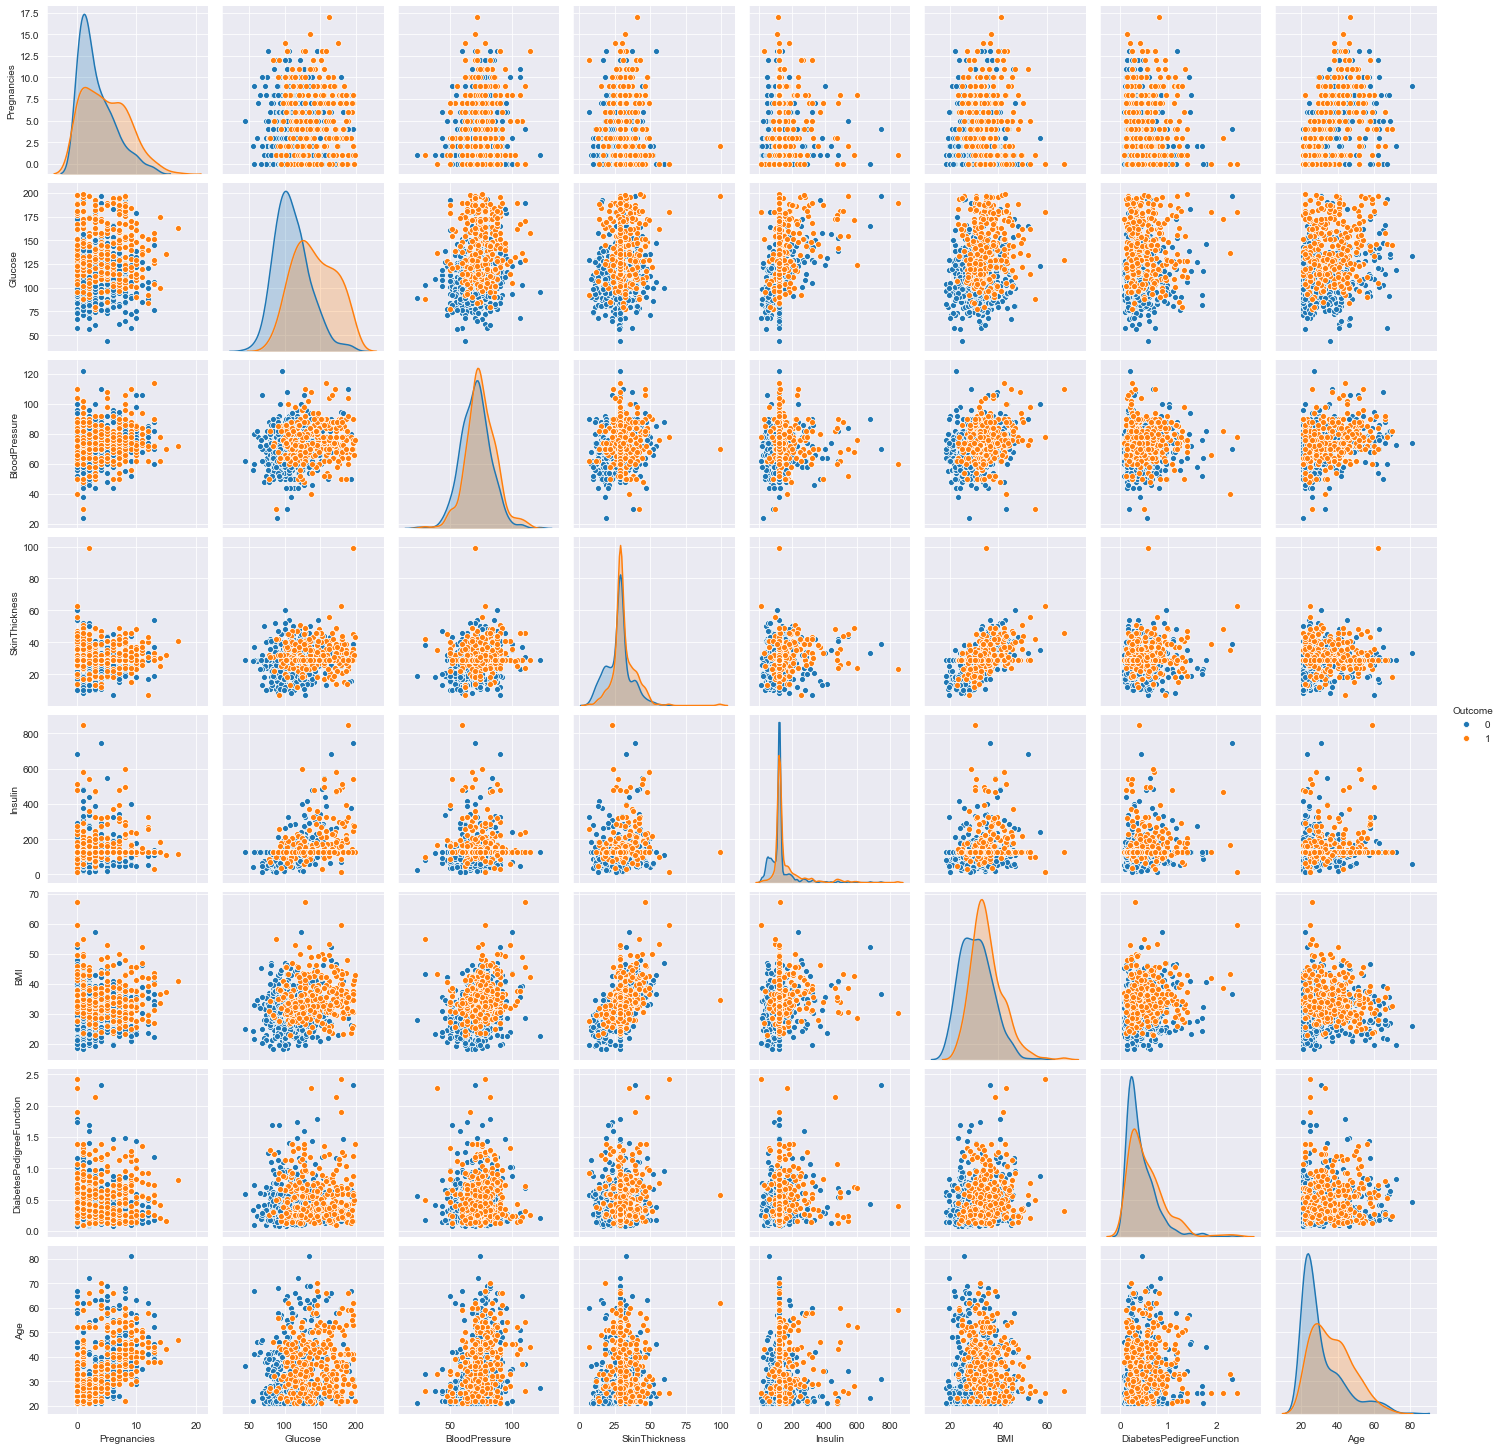

In [43]:
#pair plot 
p = sns.pairplot(data=df, hue = 'Outcome')

Text(0.5, 1, 'Correlation map')

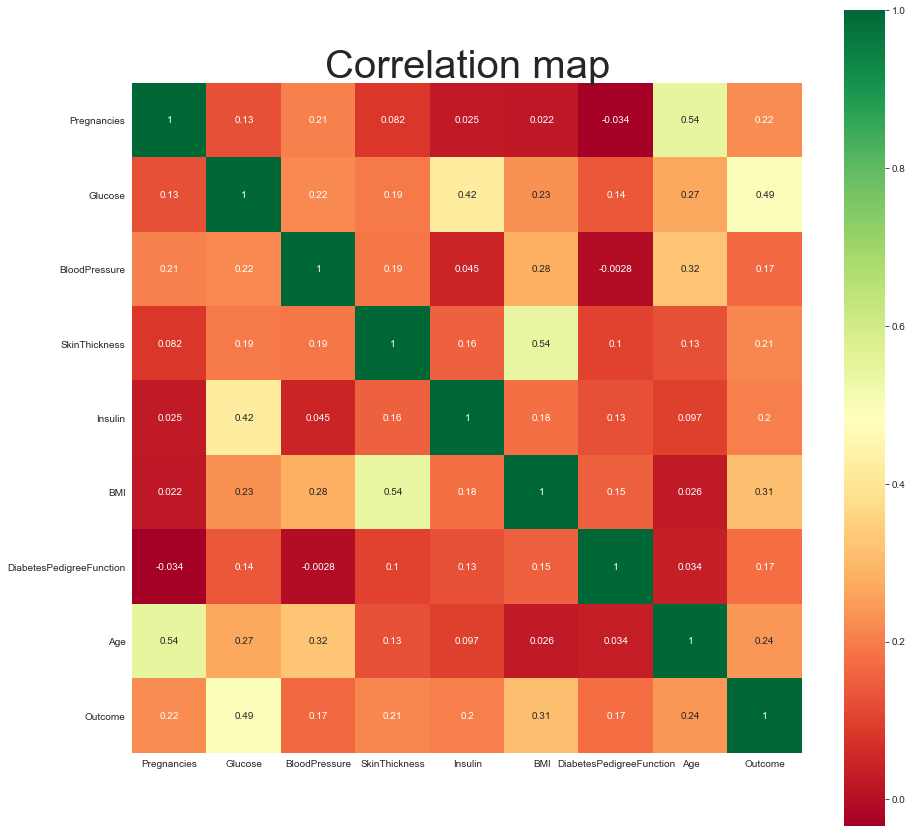

In [45]:
#correlation heat map

corr = df_copy.corr()

plt.figure(figsize = (15,15))
sns.heatmap(df_copy.corr(), annot = True, square = True, cmap = 'RdYlGn')
plt.title('Correlation map', fontsize = 40)

### Scaling data for a Euclidean distance based algorithm

In [47]:
#Scaling data is important for euclidean distance based algorithms
#Since we are using K-Nearest Neighbor classifier, we standardize data where mean =0, st.dev. = 1
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome'], axis = 1),), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [49]:
y = df.Outcome

### Modeling

In [56]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state=42, stratify=y)
#stratify - proportion of the values produced by the split will be the same as the proportion of stratify parameter

In [57]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    test_scores.append(knn.score(X_test, y_test))

In [58]:
max_test_score = max(test_scores)

In [63]:
neighbors = [i for i, v in enumerate(test_scores) if v == max_test_score]
#returns a list in case more than 1 value produces the best score

In [70]:
print('The best accuracy of {:.2f}% where k = {} '.format(max_test_score*100, list(map(lambda x:x+1, neighbors))))

The best accuracy of 76.56% where k = [11] 


#### Visualizing Results

Text(0, 0.5, 'Accuracy')

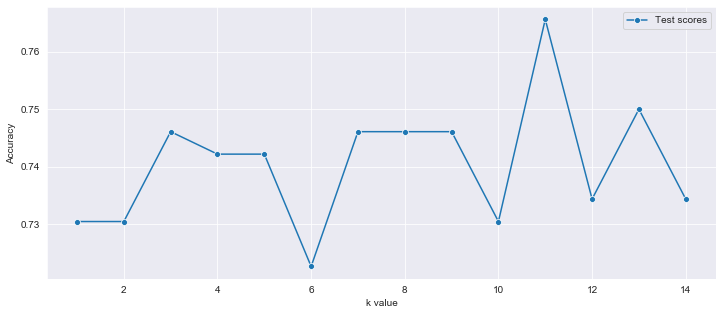

In [75]:
#visualize results
plt.figure(figsize = (12,5))
sns.lineplot(range(1,15), test_scores, marker = 'o', label = 'Test scores')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [80]:
#final model
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.765625

Text(34.0, 0.5, 'Actual label')

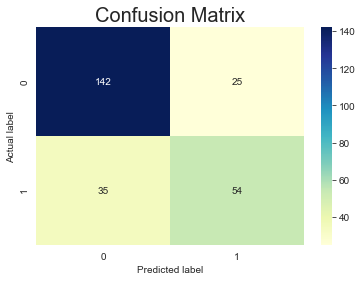

In [85]:
#Confusion matrix
from sklearn import metrics
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Grid Search 

In [86]:
#Grid Search to find best parameters
from sklearn.model_selection import GridSearchCV

#n neighbors params
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print('Best score: ' + str(knn_cv.best_score_))
print('Best Parameters: ' + str(knn_cv.best_params_))

Best score: 0.7871121264039596
Best Parameters: {'n_neighbors': 14}
